<a href="https://colab.research.google.com/github/Diegoferrua/ColabGoogle/blob/main/Analisis_sentimiento_Youtube_Ingles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-api-python-client
import nltk
nltk.download('popular')
nltk.download('vader_lexicon')
from googleapiclient.discovery import build
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Configuración de YouTube API
youtube = build("youtube", "v3", developerKey="Escribe_aquí_tu_key")

In [ ]:
# Obtener comentarios de YouTube
comments = []
page_token = None
while True:
    request = youtube.commentThreads().list(
        part="snippet",
        videoId="fUEjCXpOjPY",
        maxResults=100,
        pageToken=page_token
    )
    response = request.execute()
    comments.extend([item['snippet']['topLevelComment']['snippet']['textOriginal'] for item in response['items']])
    page_token = response.get('nextPageToken')
    if not page_token:
        break

In [ ]:
# Funciones de limpieza de texto
def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def to_lower(text):
    return text.lower()

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word not in stop_words]

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

def complete_clean(text):
    text = clean_text(text)
    text = to_lower(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    return text



In [ ]:
# Limpieza de comentarios
clean_comments = [complete_clean(comment) for comment in comments]
clean_comments = [' '.join(comment) if isinstance(comment, list) else comment for comment in clean_comments]

In [ ]:
# Análisis de sentimiento
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(comment) for comment in clean_comments]


In [ ]:
# Visualización
df = pd.DataFrame(sentiments)
print(df)

       neg    neu    pos  compound
0    0.178  0.695  0.127   -0.6908
1    0.186  0.691  0.123   -0.1650
2    0.000  0.408  0.592    0.4404
3    0.000  0.000  0.000    0.0000
4    0.000  1.000  0.000    0.0000
..     ...    ...    ...       ...
843  0.000  0.220  0.780    0.7964
844  0.000  0.000  1.000    0.4215
845  0.000  0.000  1.000    0.4215
846  0.000  0.388  0.612    0.7845
847  0.000  1.000  0.000    0.0000

[848 rows x 4 columns]


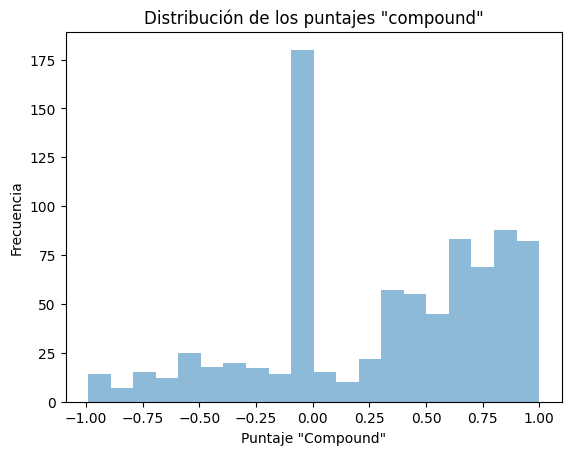

In [ ]:
# Distribución de los puntajes "compound"
compound_scores = [item['compound'] for item in sentiments]
plt.hist(compound_scores, bins=20, alpha=0.5)
plt.title('Distribución de los puntajes "compound"')
plt.xlabel('Puntaje "Compound"')
plt.ylabel('Frecuencia')
plt.show()